In [2]:
import sys
sys.path.append('../../Model')
from Inclusion import Inclusion
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import distributions for all individuals seperately
a=np.load('../../Data/Alpha_distribution.npy')
b=np.load('../../Data/Beta_distribution.npy')
alphas=pd.DataFrame(a,columns=['S'+str(x) for x in range(1,a.shape[1]+1)]).iloc[:12]
betas=pd.DataFrame(b,columns=['S'+str(x) for x in range(1,a.shape[1]+1)]).iloc[:12]

In [4]:
#Experimental distributions (All subjects combined)
counts_alpha=np.sum(alphas,axis=1)
counts_beta=np.sum(betas,axis=1)

Experimental paired distribution specificed. 

MAP Estimates:
la: 0.077 (0.069,0.093)
ga: 4.144 (4.134,4.155)
f_a: 0.086 (0.079,0.092)
s_a: 0.530 (0.530,0.531)
f_b: 0.042 (0.035,0.048)
s_b: 0.387 (0.386,0.387)


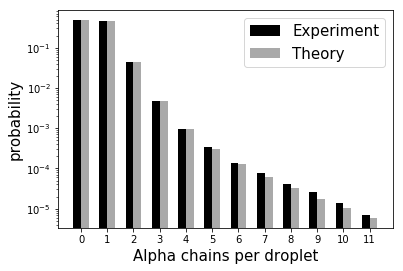

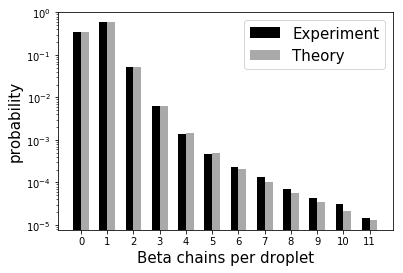

In [5]:
df=Inclusion(alpha=counts_alpha,beta=counts_beta,plot_dist=1)

In [6]:
df=np.empty(8,dtype=object)
for i,subject in enumerate(np.unique(alphas.columns)):
    counts_alpha=np.array(alphas[subject])
    counts_beta=np.array(betas[subject])
    df[i]=Inclusion(alpha=counts_alpha,beta=counts_beta,calculate_posterior=1,N_random_starts=100,print_estimates=0)

In [7]:
MAP=[]
lower=[]
upper=[]
for i in range(df.shape[0]):
    MAP.append(df[i].return_map)
    lower.append(df[i].return_map_interval_lower)
    upper.append(df[i].return_map_interval_upper)
MAP=pd.DataFrame(MAP,columns=['la','ga','fa','sa','fb','sb'])
lower=pd.DataFrame(lower,columns=['la','ga','fa','sa','fb','sb'])
upper=pd.DataFrame(upper,columns=['la','ga','fa','sa','fb','sb'])

In [8]:
data=[]
for i in range(MAP.shape[0]):
    data.append([0,MAP.iloc[i].fa,i,lower.iloc[i].fa,upper.iloc[i].fa])
    data.append([1,MAP.iloc[i].fb,i,lower.iloc[i].fb,upper.iloc[i].fb])
df=pd.DataFrame(np.vstack(data).astype(float),columns=['x','y','hue','low','upper'])
df[['y','low','upper']]=df[['y','low','upper']]*100

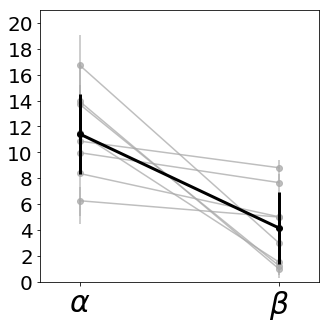

Alpha: 11.422009211169295 +/- 3.1253449914012905
Geta: 4.1580229942058615 +/- 2.7888440357329762
p value: 0.007298423426218131


In [9]:
plt.figure(figsize=(5,5))
for i in df.hue.unique():
    data=df[df.hue==i]
    plt.errorbar(data.x,data.y,np.vstack((data.y-data.low,data.upper-data.y)),linestyle='-',color='DarkGray',fmt='o',alpha=.75,zorder=i)
plt.errorbar([0,1],np.vstack((np.mean(df[df.x==0].y),np.mean(df[df.x==1].y))),[np.std(df[df.x==0].y),np.std(df[df.x==1].y)],color='k',fmt='o',linestyle='-',lw=3,zorder=i+1)
plt.xlim([-.2,1.2])
plt.ylim([0,21])
plt.xticks(np.arange(2),[r'$\alpha$',r'$\beta$'],fontsize=30)
plt.yticks(np.arange(0,22,2),np.array(np.arange(0,22,2)).astype(int),fontsize=20)
plt.savefig('{}.eps'.format('/Users/jac/Documents/Allelic_Inclusion_Figures/Fig1E'),format='eps', dpi=1200,transparent=True)
plt.show()
plt.close()

print(f'Alpha: {np.mean(df[df.x==0].y)} +/- {np.std(df[df.x==0].y)}')
print(f'Geta: {np.mean(df[df.x==1].y)} +/- {np.std(df[df.x==1].y)}')
print(f'p value: {stats.ttest_rel(df[df.x==0].y,df[df.x==1].y)[1]}')